In [1]:
import Hokusai
import PyPlot

In [2]:
# variables/parameters
img = 1
sigma = 50
tau = 60
symmetrize = false #reversible MC?
method = :crispness #which method should be used for optimisation
ratematrix = false #select highest/lowest eigenvalue
# possible number of clusters
kmin = 3
kmax = 10

10

In [3]:
function getNumberOfClusters(image, method)
    # filter and prepare data
    data = Hokusai.filterdata(Hokusai.DATA, image);
    ts = Hokusai.TimeSeries(data);
    # get transition matrix
    grid = Hokusai.points(ts);
    P = Hokusai.transitionmatrix(ts, sigma, tau, grid, symmetrize);
    # get stationary distribution
    pi = Hokusai.stationaryDistr(P, ratematrix)
    # objective to maximize
    otm = zeros(kmax - kmin + 1, 2)
    for k = kmin:kmax
        # schurfactorization
        X, λ = Hokusai.schurvectors(P, pi, k, ratematrix)
        #println(X'*diagm(pi)*X)
        # objective function
        if     method == :scaling        obj = A -> Hokusai.I1(A,X)
        elseif method == :metastability  obj = A -> Hokusai.I2(A,λ)
        elseif method == :crispness      obj = A -> Hokusai.I3(A)
        end
        # compute A via prechosen fct obj
        A = Hokusai.guessinit(X)
        A = Hokusai.opt(A, X, obj)
        # trace(S)/k
        otm[k - kmin + 1, 2] = Hokusai.I3(A)/k
        otm[k - kmin + 1, 1] = k
        println(otm[k - kmin + 1,:])
    end
    otm
end

getNumberOfClusters (generic function with 1 method)

scaling
image 1
[3.0, 0.592115]
[4.0, 0.539323]
[5.0, 0.467007]
[6.0, 0.554412]
[7.0, 0.370495]
[8.0, 0.347622]
[9.0, 0.237864]
[10.0, 0.204283]
best number of clusters: 3.0
image 2
[3.0, 0.530361]
[4.0, 0.54953]
[5.0, 0.455918]
[6.0, 0.366096]
[7.0, 0.337778]
[8.0, 0.269739]
[9.0, 0.317194]
[10.0, 0.2784]
best number of clusters: 4.0
image 3
[3.0, 0.46389]
[4.0, 0.456254]
[5.0, 0.327201]
[6.0, 0.286247]
[7.0, 0.304498]
[8.0, 0.305236]
[9.0, 0.386187]
[10.0, 0.298254]
best number of clusters: 3.0
image 4
[3.0, 0.542937]
[4.0, 0.497035]
[5.0, 0.363099]
[6.0, 0.394205]
[7.0, 0.404731]
[8.0, 0.343539]
[9.0, 0.36018]
[10.0, 0.311275]
best number of clusters: 3.0
image 5
[3.0, 0.448845]
[4.0, 0.431526]
[5.0, 0.368433]
[6.0, 0.415233]
[7.0, 0.329885]
[8.0, 0.287479]
[9.0, 0.236657]
[10.0, 0.222335]
best number of clusters: 3.0
image 6
[3.0, 0.482015]
[4.0, 0.462809]
[5.0, 0.349048]
[6.0, 0.442289]
[7.0, 0.313953]
[8.0, 0.337918]
[9.0, 0.260703]
[10.0, 0.221591]
best number of clusters: 3.0
i

/home/lara/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[3.0, 0.508911]
[4.0, 0.471882]
[5.0, 0.372064]
[6.0, 0.42326]
[7.0, 0.330027]
[8.0, 0.357334]
[9.0, 0.273973]
[10.0, 0.230051]
best number of clusters: 3.0
image 7
[3.0, 0.560821]
[4.0, 0.468698]
[5.0, 0.55105]
[6.0, 0.43982]
[7.0, 0.428085]
[8.0, 0.360896]
[9.0, 0.305705]
[10.0, 0.261912]
best number of clusters: 3.0
image 8
[3.0, 0.499378]
[4.0, 0.461879]
[5.0, 0.392329]
[6.0, 0.397866]
[7.0, 0.37725]
[8.0, 0.342456]
[9.0, 0.271976]


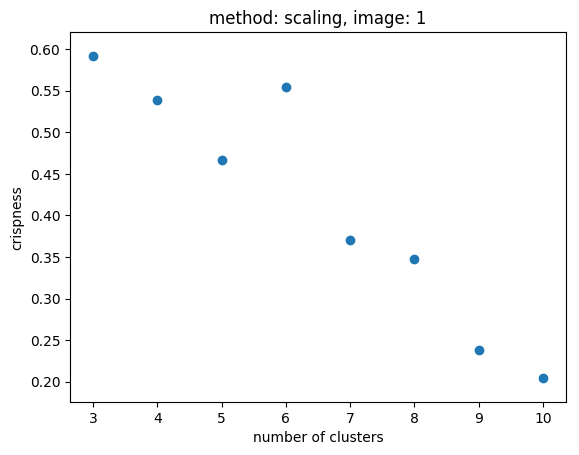

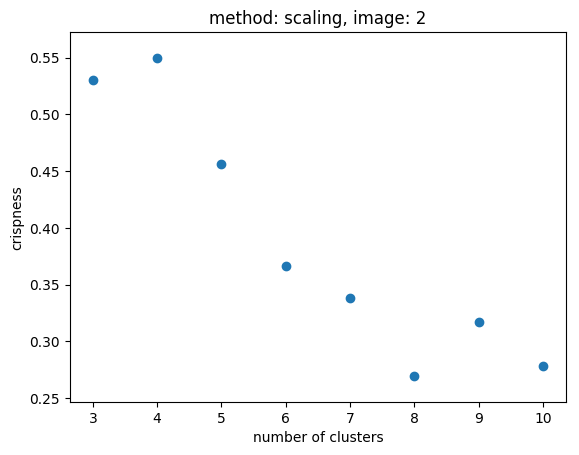

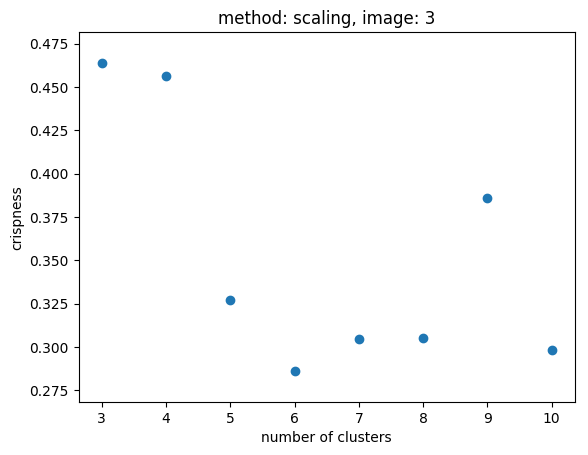

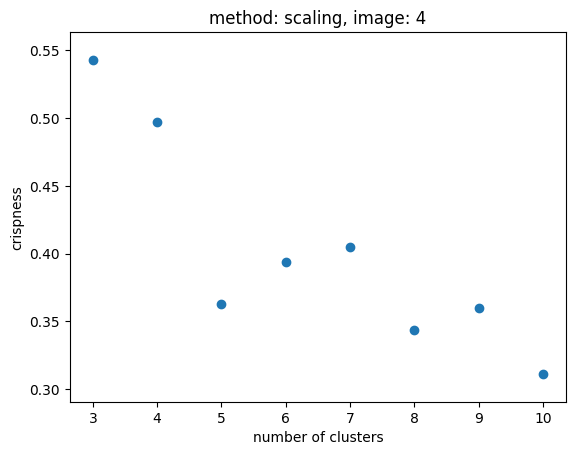

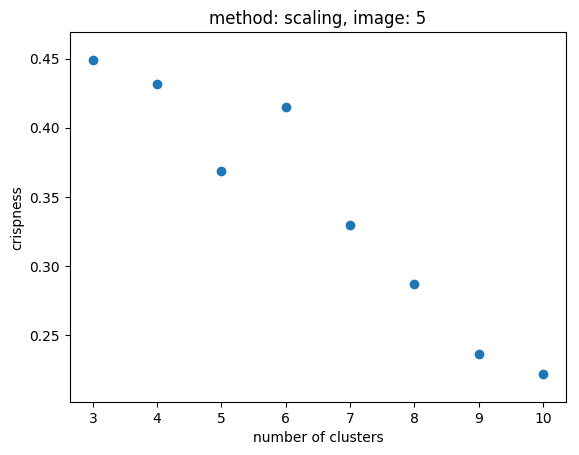

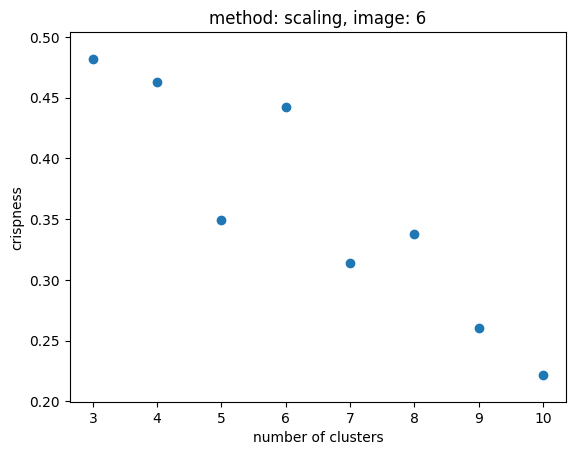

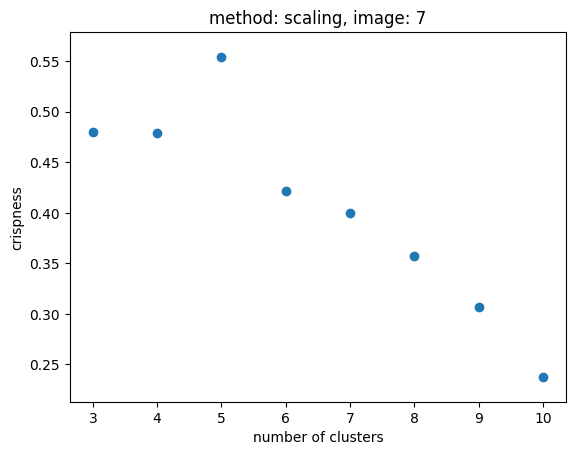

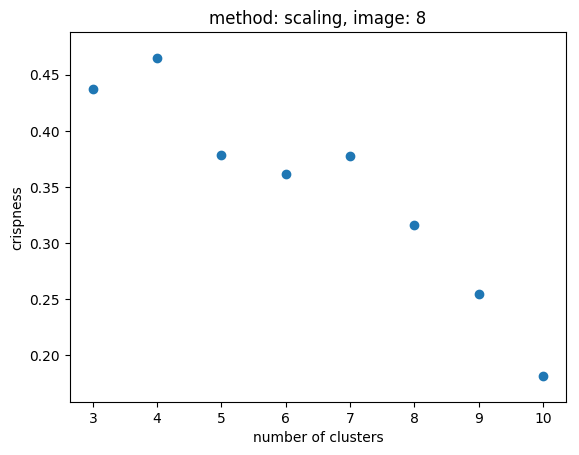

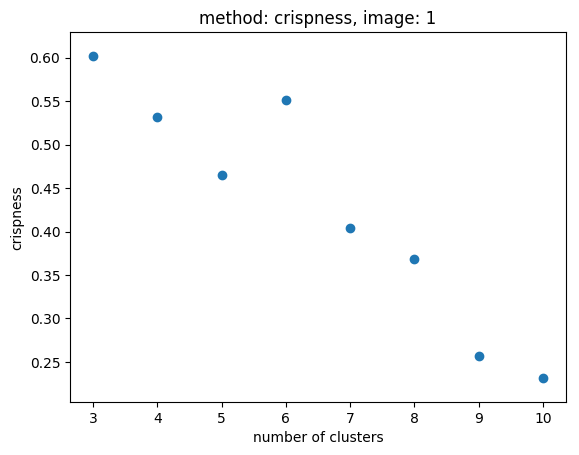

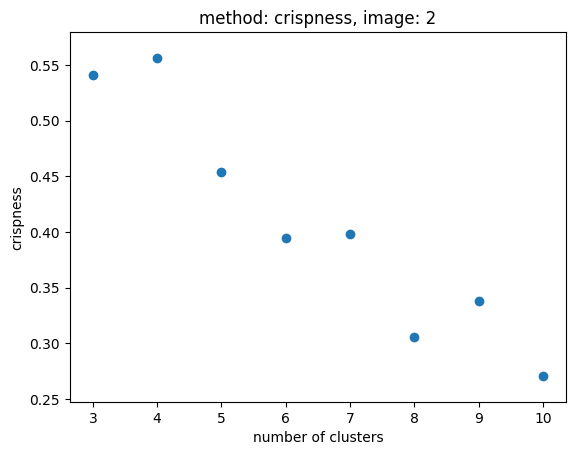

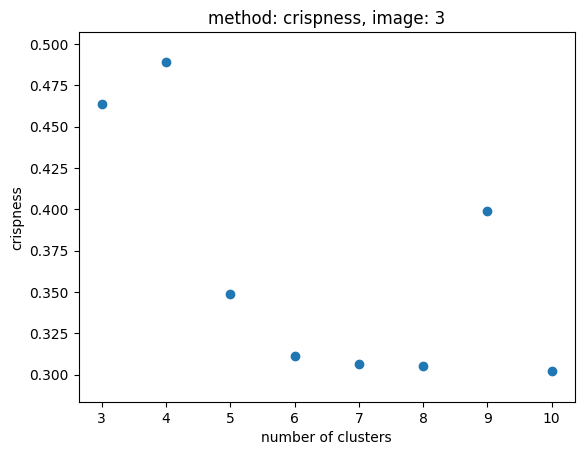

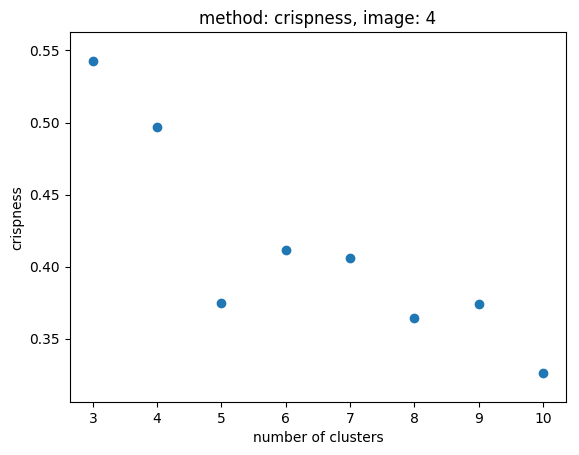

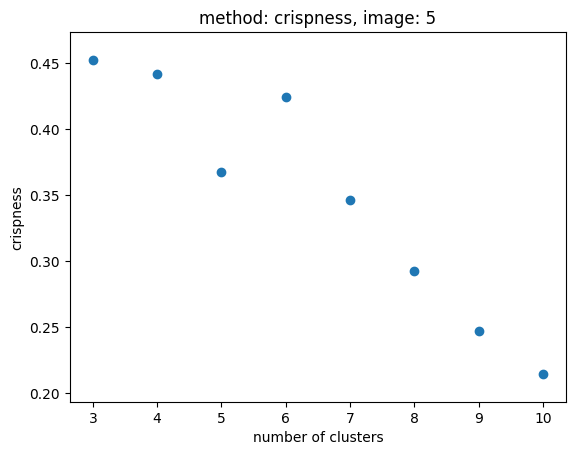

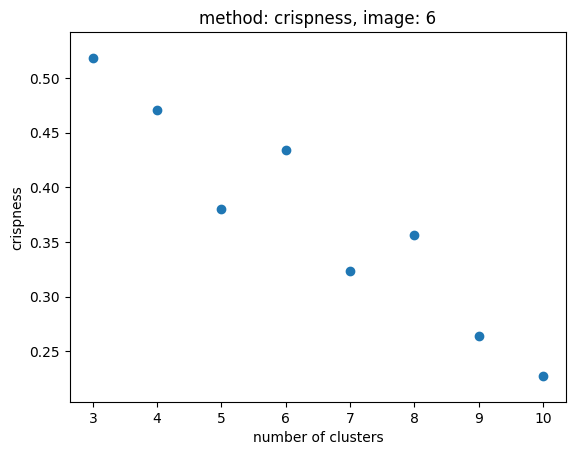

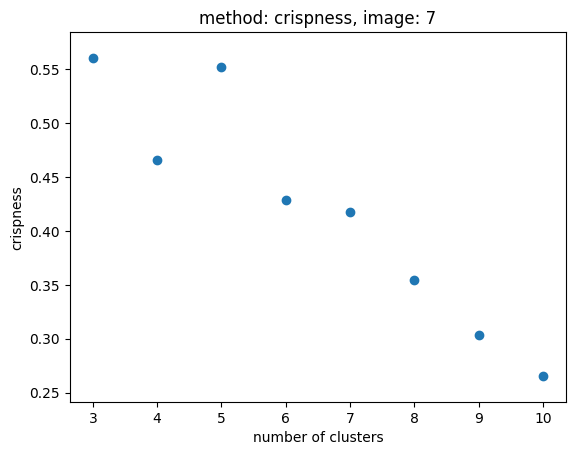

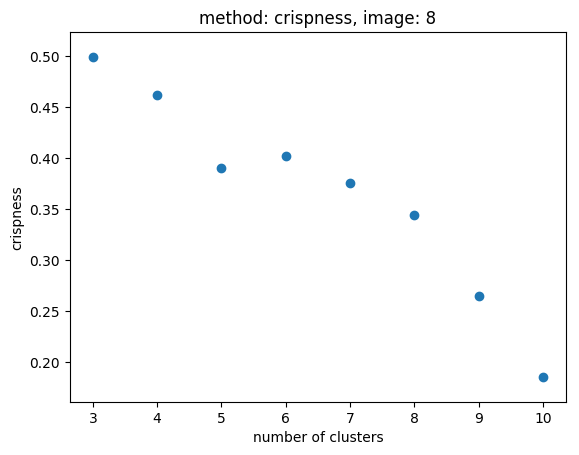

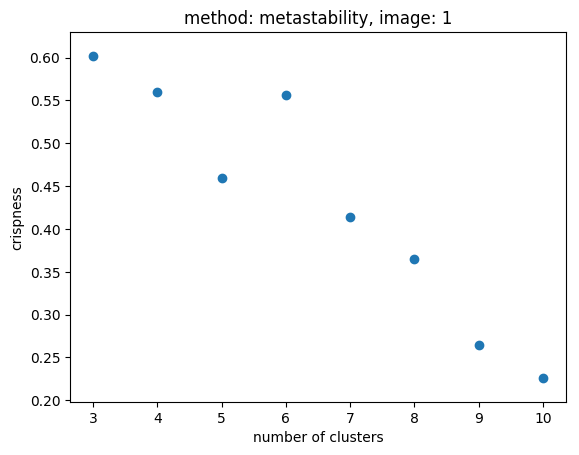

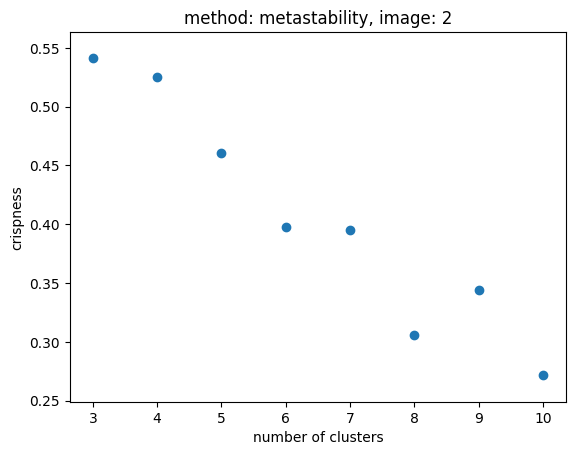

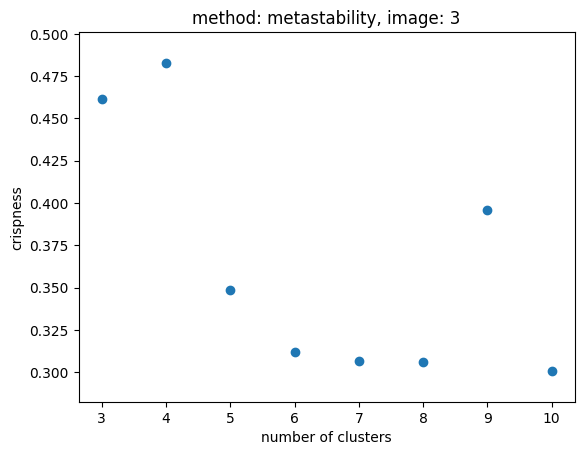

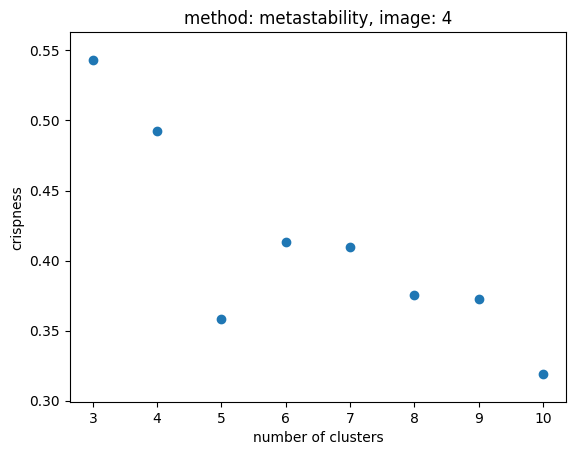

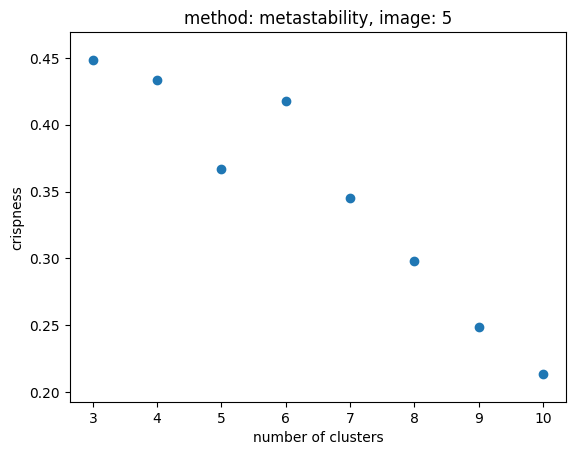

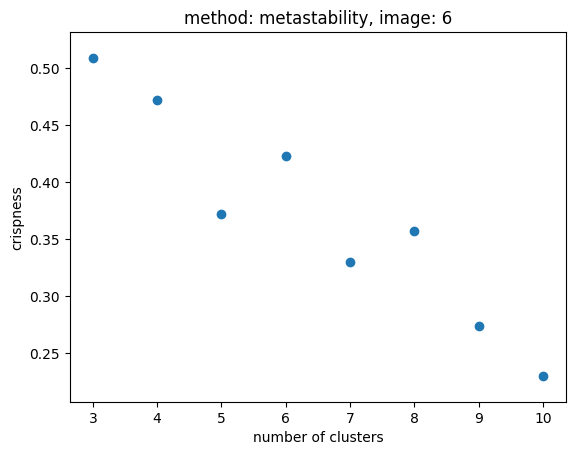

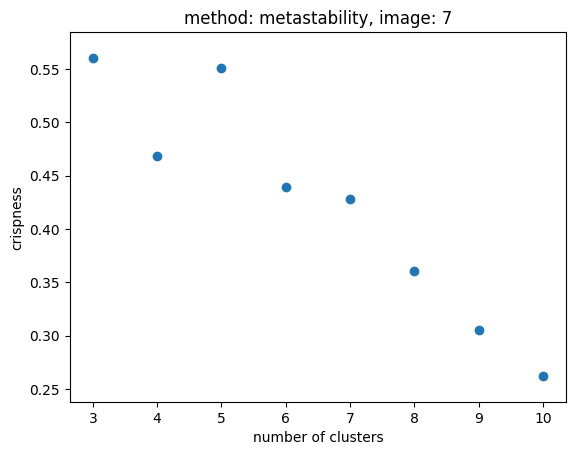

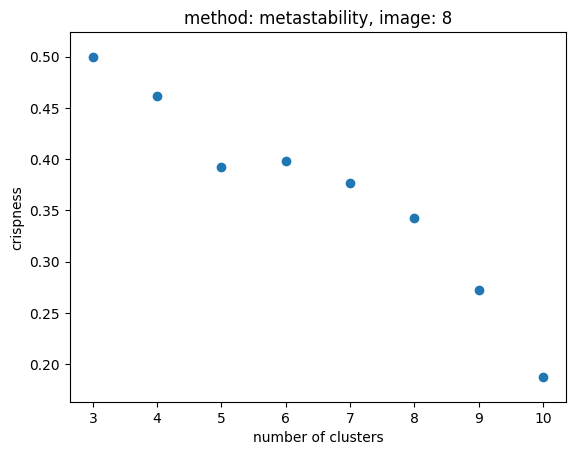

[10.0, 0.187999]
best number of clusters: 3.0


In [4]:
for method in [:scaling, :crispness, :metastability]
    println(method)
    for i in 1:8
        println("image ", i)
        otm = getNumberOfClusters(i, method)
        PyPlot.figure()
        PyPlot.scatter(otm[:,1], otm[:,2])
        PyPlot.xlabel("number of clusters")
        PyPlot.ylabel("crispness")
        PyPlot.title(string("method: ",method,", image: ",i))
        PyPlot.show()
        PyPlot.gcf()
        # "best" number of clusters
        n = otm[indmax(otm[:,2]),1]
        println("best number of clusters: ", n)
    end
end